In [11]:
# Student Names
# Muscaan Balli - 23205368
# Rohit Sharma - 23200487
# Olumayokun Fadelu - 23201323
# Muhammad Usama Bhatti - 23202792

In [12]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from matplotlib.backends.backend_pdf import PdfPages
from tabulate import tabulate
import statsmodels.api as sm

In [13]:
#loading data
data = pd.read_csv('Data_Mining_Data.csv')

In [5]:
data.head()

,Month,Year,Total Generation (Dependent Variable),Hydro,Solar,Wind,Thermal Generation,Average Temp,Average Wind Speed (Knot),Sunshine Duration (hrs)
0,Jan,2010,2644,97,0,248,2166,2.4,7.0,86.6
1,Feb,2010,2354,60,0,151,2044,3.3,6.5,85.0
2,Mar,2010,2450,29,0,251,2109,6.4,7.9,156.1
3,Apr,2010,2144,74,0,186,1851,9.8,7.8,230.8
4,May,2010,2113,13,0,169,1829,11.7,7.6,196.9


Mean Squared Error: 7952.045978414585


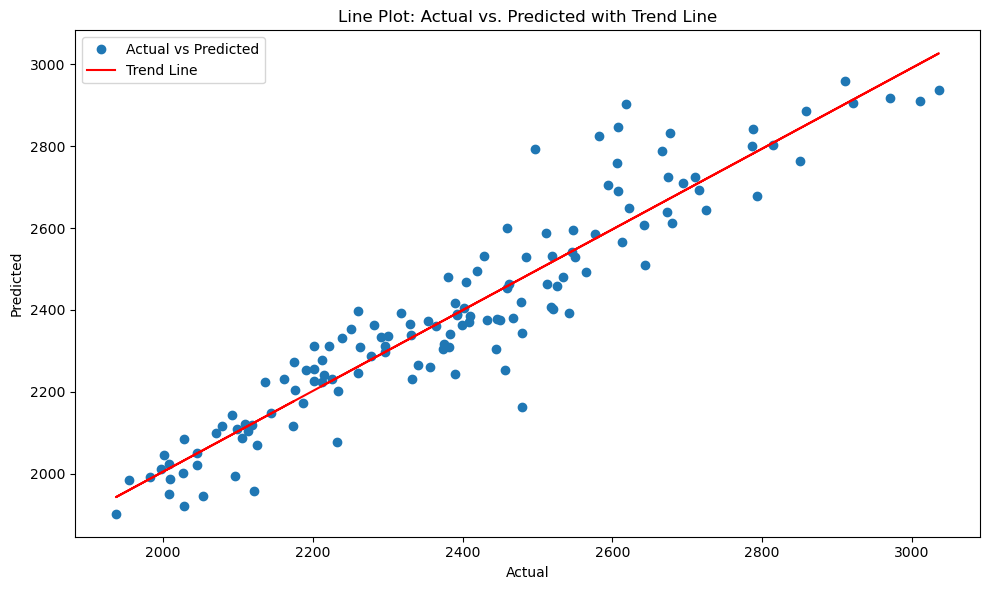

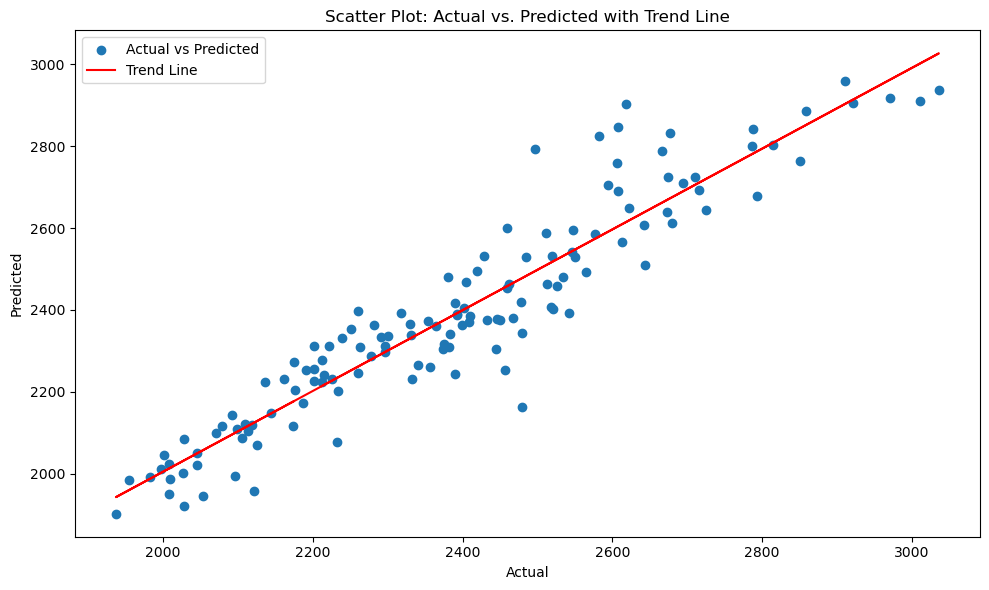

In [4]:
#splitting data into dependent and independent variables
X = data[['Hydro', 'Solar', 'Wind', 'Thermal Generation', 'Average Temp', 
          'Average Wind Speed (Knot)', 'Sunshine Duration (hrs)']]
y = data['Total Generation (Dependent Variable)']

#Splitting data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8, random_state=30)


X_train = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train).fit()


X_test = sm.add_constant(X_test)
y_pred = model.predict(X_test)

results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Calculate Regression Metrics
mse = mean_squared_error(y_test, y_pred)
#r2 = r2_score(y_test, y_pred)
#mae = mean_absolute_error(y_test, y_pred)


#Save regression summary to a string
summary_str = model.summary().as_text()


print('Mean Squared Error:', mse)
#print('R-squared:', r2)
#print('Mean Absolute Error:', mae)


# Calculate trend line
z = np.polyfit(y_test, y_pred, 1)
p = np.poly1d(z)

# Line Plot Actual vs. Predicted with trend line
plt.figure(figsize=(10, 6))
plt.plot(y_test, y_pred, 'o', label='Actual vs Predicted')
plt.plot(y_test, p(y_test), color='red', label='Trend Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Line Plot: Actual vs. Predicted with Trend Line')
plt.legend()
plt.tight_layout()

# Scatter Plot Actual vs. Predicted with trend line
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, label='Actual vs Predicted')
plt.plot(y_test, p(y_test), color='red', label='Trend Line')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Scatter Plot: Actual vs. Predicted with Trend Line')
plt.legend()
plt.tight_layout()